In [ ]:
pip install pysentimiento

In [ ]:
from pysentimiento import create_analyzer
analyzer=create_analyzer(task="emotion",lang="en")
anz=analyzer.predict("I am Happy")
anz.output


'joy'

In [ ]:
hateful=create_analyzer(task="hate_speech",lang="en")
anz=hateful.predict("I am Happy")
anz.probas


{'hateful': 0.023482671007514,
 'targeted': 0.014045126736164093,
 'aggressive': 0.01051108818501234}

In [ ]:
!kaggle datasets download -d noorsaeed/news-categories-dataset

Dataset URL: https://www.kaggle.com/datasets/noorsaeed/news-categories-dataset
License(s): MIT
  0% 0.00/1.83M [00:00<?, ?B/s]
100% 1.83M/1.83M [00:00<00:00, 103MB/s]


In [ ]:
!unzip news-categories-dataset.zip

Archive:  news-categories-dataset.zip
  inflating: bbc-text.csv            


In [ ]:
import pandas as pd
df=pd.read_csv("/content/bbc-text.csv")
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


<Axes: xlabel='category'>

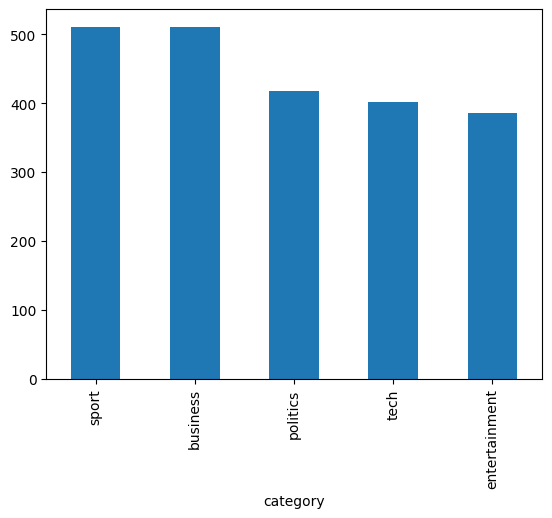

In [ ]:
df.category.value_counts().plot(kind="bar")

In [ ]:

df.isnull().sum()

category    0
text        0
dtype: int64

In [ ]:

from sklearn.model_selection import train_test_split


df_train, df_test = train_test_split(df, test_size=0.2, shuffle=True, random_state=42)


print("Train Set:")
print(df_train.shape)

print("Test Set:")
print(df_test.shape)

Train Set:
(1780, 2)
Test Set:
(445, 2)


In [ ]:
df_train['category'].value_counts()

category
sport            413
business         409
politics         334
tech             319
entertainment    305
Name: count, dtype: int64

In [ ]:
encoded_dict = {"sport":0,"business":1, 'politics':2, "entertainment":3,'tech':4}
df_train['category'] = df_train['category'].map(encoded_dict)

In [ ]:
df_test['category'] = df_test['category'].map(encoded_dict)

In [ ]:
# prompt: import to_categorical

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(df_train['category'])
y_test = to_categorical(df_test['category'])


In [ ]:
print(y_train)

[[0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]]


In [ ]:
print(y_test)

[[0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [ ]:
from transformers import AutoTokenizer,TFBertModel
tokenizer=AutoTokenizer.from_pretrained("bert-base-cased")
bert=TFBertModel.from_pretrained("bert-base-cased")


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

In [ ]:
text=["Noor saeed ML engineer ", "He is good"]
tokenized_text=tokenizer(text,padding=True,truncation=True,return_tensors="tf")
tokenized_text

{'input_ids': <tf.Tensor: shape=(2, 9), dtype=int32, numpy=
array([[  101,  1302,  1766, 21718, 11394,   150,  2162,  3806,   102],
       [  101,  1124,  1110,  1363,   102,     0,     0,     0,     0]],
      dtype=int32)>, 'token_type_ids': <tf.Tensor: shape=(2, 9), dtype=int32, numpy=
array([[0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(2, 9), dtype=int32, numpy=
array([[1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 0, 0, 0]], dtype=int32)>}

In [ ]:
max_len_train = max(len(text) for text in df_train['text'])
max_len_test= max(len(text) for text in df_test['text'])
max_len_train ,max_len_test

(19136, 25483)

In [ ]:
max_len = 70
x_train = tokenizer(
    text=df_train.text.tolist(),
    add_special_tokens=True,
    max_length=max_len,
    truncation=True,
    padding=True,
    return_tensors='tf',
    return_token_type_ids=False,
    return_attention_mask=True,
    verbose=True
)

In [ ]:
x_test = tokenizer(
    text=df_test.text.tolist(),
    add_special_tokens=True,
    max_length=max_len,
    truncation=True,
    padding=True,
    return_tensors='tf',
    return_token_type_ids=False,
    return_attention_mask=True,
    verbose=True
)

In [ ]:
Tokenizer takes all the necessary parameters and returns tensor in the same format Bert accepts.

return_token_type_ids = False: token_type_ids is not necessary for our training in this case.

return_attention_mask = True we want to include attention_mask in our input.

return_tensors=’tf’: we want our input tensor for the TensorFlow model.

max_length=70: we want the maximum length of each sentence to be 70; if a sentence is bigger than this, it will be trimmed if a sentence is smaller than 70 then it will be padded.

add_special_tokens=True, CLS, SEP token will be added in the tokenization.

Hereafter data modelling, the tokenizer will return a dictionary (x_train) containing ‘Input_ids’, ‘attention_mask’ as key for their respective